# Practica 1. Naturaleza del ánalisis de series de tiempo
## Integrantes: Suárez Santos Gerardo

## Dataset elegido: global_traffic_accidents.csv

Es un dataset que contiene registros sobre accidentes automovilisticos alrededor del mundo

## Importar librerias

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

## Carga del Dataset y descripcion del mismo


In [2]:
df = pd.read_csv('global_traffic_accidents.csv')
df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,2023-04-19,06:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5,7,Reckless Driving
1,debfad09,2023-01-17,02:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4,1,Drunk Driving
2,6d69aa36,2024-04-09,02:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1,7,Reckless Driving
3,425bb1f0,2023-10-10,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4,0,Drunk Driving
4,90d5cf62,2023-01-02,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3,9,Reckless Driving


#1. Construccion de la serie de tiempo:

In [4]:
# Conversion del Date a tipo datetime
df["Date"] = pd.to_datetime(df["Date"])

In [23]:
#Conteo mensual de accidentes
df["Day"] = df["Date"].dt.date
accidentes_por_dia = df.groupby("Day").size()

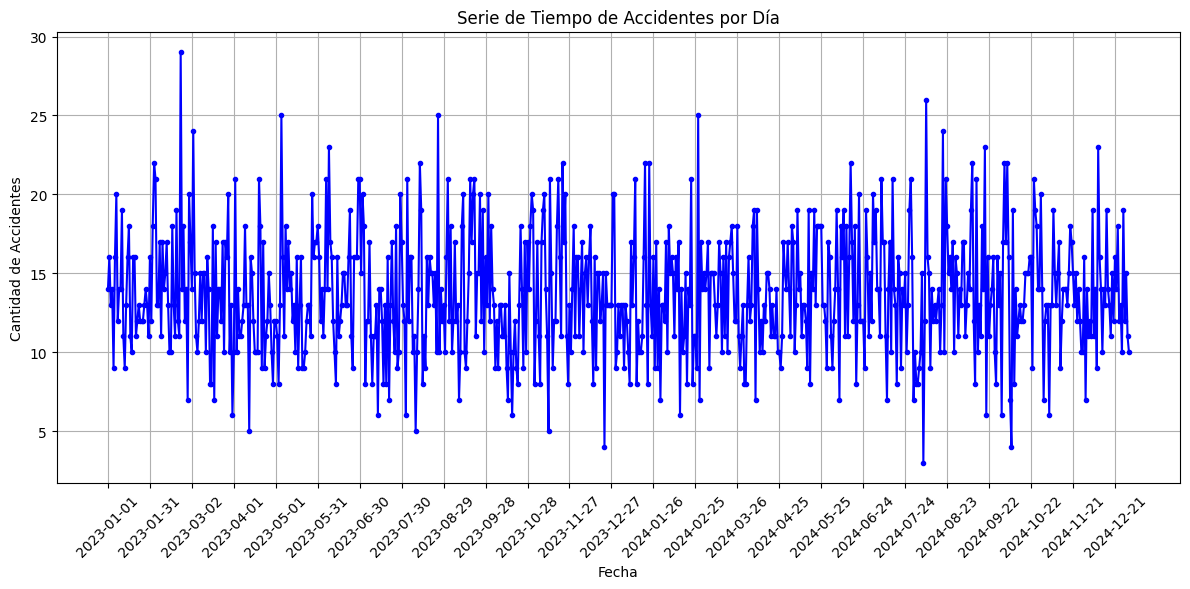

In [24]:
#Creacion de la grafica
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(accidentes_por_dia.index), accidentes_por_dia, marker="o", linestyle="-", color="b", markersize=3)
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Accidentes")
plt.title("Serie de Tiempo de Accidentes por Día")
plt.xticks(pd.to_datetime(accidentes_por_dia.index)[::30].strftime('%Y-%m-%d'), rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

#La grafica esta agrupada por mes

# 2. Encontrar promedio, media, mediana, moda, desviación estándar y varianza

Estas medidas estaran usando los accidentes por día.

## Moda

In [25]:
mode_value = accidentes_por_dia.mode()[0]
print(f"Moda: {mode_value}")

Moda: 13


## Media (Promedio)

In [26]:
mean_value = accidentes_por_dia.mean()
print(f"Media: {mean_value}")

Media: 13.679890560875513


## Mediana

In [27]:
median_value = accidentes_por_dia.median()
print(f"Mediana: {median_value}")

Mediana: 13.0


##Desviación Estándar


In [28]:
std_dev = accidentes_por_dia.std()
print(f"Desviación Estándar: {std_dev}")

Desviación Estándar: 3.8561629007050247


## Varianza

In [29]:
variance = accidentes_por_dia.var()
print(f"Varianza: {variance}")

Varianza: 14.86999231677379


#3. Identificación de granularidad, ciclos, tendencia, estacionalidad, maximo, minimos, picos, valles, razon de crecimiento y razones de reduccion.

## Granularidad

In [30]:
granularity = (df["Date"].max() - df["Date"].min()).days /len(accidentes_por_dia)
print(f"Granularidad: {granularity}")

Granularidad: 0.9986320109439124


## Tendencia

In [33]:
tendency = accidentes_por_dia.rolling(window=30).mean()
print(f"Tendencia: {tendency}")

Tendencia: Day
2023-01-01          NaN
2023-01-02          NaN
2023-01-03          NaN
2023-01-04          NaN
2023-01-05          NaN
                ...    
2024-12-27    13.666667
2024-12-28    13.733333
2024-12-29    13.700000
2024-12-30    13.833333
2024-12-31    13.700000
Length: 731, dtype: float64


## Seasonality

In [34]:
seasonality = accidentes_por_dia.diff().dropna()
print(f"Seasonality: {seasonality}")

Seasonality: Day
2023-01-02    2.0
2023-01-03   -3.0
2023-01-04    1.0
2023-01-05   -5.0
2023-01-06    7.0
             ... 
2024-12-27    9.0
2024-12-28   -7.0
2024-12-29    3.0
2024-12-30   -4.0
2024-12-31   -1.0
Length: 730, dtype: float64


## Picos


In [47]:
peaks, _ = find_peaks(accidentes_por_dia)
print(f"Picos: {peaks,_}")

Picos: (array([  1,   3,   6,  10,  15,  18,  22,  27,  30,  33,  37,  39,  42,
        46,  49,  52,  54,  56,  58,  61,  66,  68,  71,  75,  77,  79,
        82,  84,  86,  88,  91,  93,  98, 102, 108, 111, 115, 119, 124,
       127, 129, 131, 133, 135, 138, 143, 146, 150, 153, 156, 158, 164,
       168, 173, 179, 182, 187, 192, 194, 198, 200, 203, 206, 209, 214,
       216, 219, 223, 226, 228, 230, 234, 236, 238, 240, 243, 245, 248,
       250, 254, 259, 262, 266, 268, 270, 272, 274, 278, 280, 284, 287,
       291, 295, 298, 300, 303, 307, 312, 316, 322, 325, 327, 330, 333,
       335, 339, 342, 345, 348, 350, 354, 356, 361, 365, 367, 370, 374,
       377, 379, 384, 387, 390, 392, 394, 396, 399, 401, 403, 406, 408,
       410, 413, 415, 417, 419, 422, 424, 426, 429, 432, 437, 440, 442,
       446, 450, 454, 458, 462, 464, 467, 469, 471, 475, 478, 483, 486,
       489, 493, 495, 497, 501, 503, 505, 508, 515, 521, 524, 526, 528,
       531, 534, 537, 542, 545, 547, 549, 553, 559, 561,

## Valles

In [48]:
valleys,_= find_peaks(-accidentes_por_dia)
print(f"Valles: {valleys,_}")

Valles: (array([  2,   4,   7,  12,  17,  20,  24,  29,  31,  35,  38,  40,  44,
        48,  51,  53,  55,  57,  60,  64,  67,  70,  73,  76,  78,  81,
        83,  85,  87,  89,  92,  94, 101, 106, 110, 112, 118, 122, 126,
       128, 130, 132, 134, 136, 139, 145, 147, 152, 154, 157, 163, 165,
       170, 175, 181, 184, 189, 193, 197, 199, 201, 205, 207, 213, 215,
       218, 220, 225, 227, 229, 233, 235, 237, 239, 241, 244, 246, 249,
       251, 256, 260, 263, 267, 269, 271, 273, 277, 279, 282, 286, 289,
       293, 297, 299, 301, 305, 309, 315, 318, 324, 326, 329, 331, 334,
       337, 340, 343, 347, 349, 352, 355, 358, 363, 366, 369, 373, 375,
       378, 380, 386, 389, 391, 393, 395, 398, 400, 402, 405, 407, 409,
       411, 414, 416, 418, 421, 423, 425, 427, 430, 435, 439, 441, 443,
       448, 452, 455, 459, 463, 466, 468, 470, 474, 476, 481, 485, 488,
       491, 494, 496, 500, 502, 504, 506, 514, 518, 523, 525, 527, 529,
       533, 535, 541, 544, 546, 548, 552, 557, 560, 564

In [50]:
max_value = accidentes_por_dia.iloc[peaks]
min_value = accidentes_por_dia.iloc[valleys]

## Grafica con picos y valles

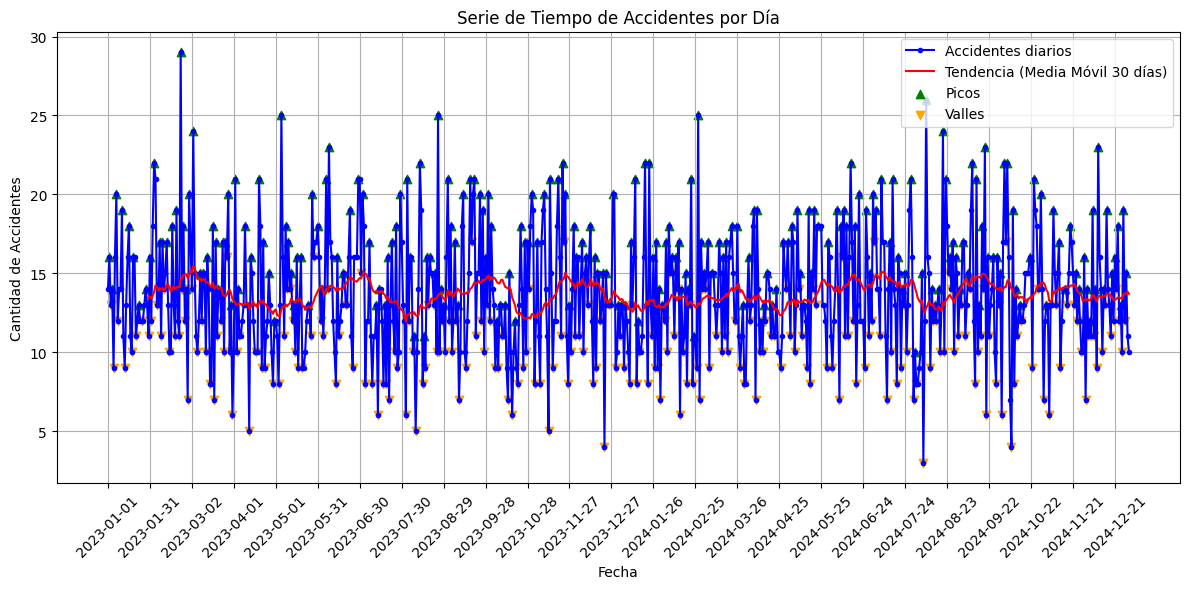

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(accidentes_por_dia.index), accidentes_por_dia, marker="o", linestyle="-", color="b", markersize=3, label="Accidentes diarios")
plt.plot(pd.to_datetime(accidentes_por_dia.index), tendency, color="r", label="Tendencia (Media Móvil 30 días)")
plt.scatter(pd.to_datetime(accidentes_por_dia.index)[peaks], max_value, color="g", label="Picos", marker="^")
plt.scatter(pd.to_datetime(accidentes_por_dia.index)[valleys], min_value, color="orange", label="Valles", marker="v")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Accidentes")
plt.title("Serie de Tiempo de Accidentes por Día")
plt.xticks(pd.to_datetime(accidentes_por_dia.index)[::30].strftime('%Y-%m-%d'), rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Razón de Crecimiento

In [52]:
growth_rate = (accidentes_por_dia.pct_change().dropna() * 100).mean()
print(f"Razón de Crecimiento: {growth_rate:.2f}%")

Razón de Crecimiento: 9.66%


## Razón de reducción


In [53]:
reduction_rate = (accidentes_por_dia.pct_change().dropna() * 100).min()
print(f"Razón de Reducción: {reduction_rate:.2f}%")

Razón de Reducción: -80.00%
